In [1]:
import pandas as pd
import quandl
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
quandl.ApiConfig.api_key = 'kjxmEsp7P7_qP4_jkBnz'

In [3]:
df = quandl.get('EOD/AAPl')

In [4]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


In [7]:
df.nunique()

Open          1029
High          1029
Low           1025
Close         1017
Volume        1089
Dividend         7
Split            2
Adj_Open      1070
Adj_High      1070
Adj_Low       1066
Adj_Close     1069
Adj_Volume    1089
dtype: int64

In [8]:
df['Split'].value_counts()

1.0    1089
7.0       1
Name: Split, dtype: int64

In [9]:
(df[['Dividend']]<3.29).value_counts()

Dividend
True        1089
False          1
dtype: int64

<AxesSubplot:>

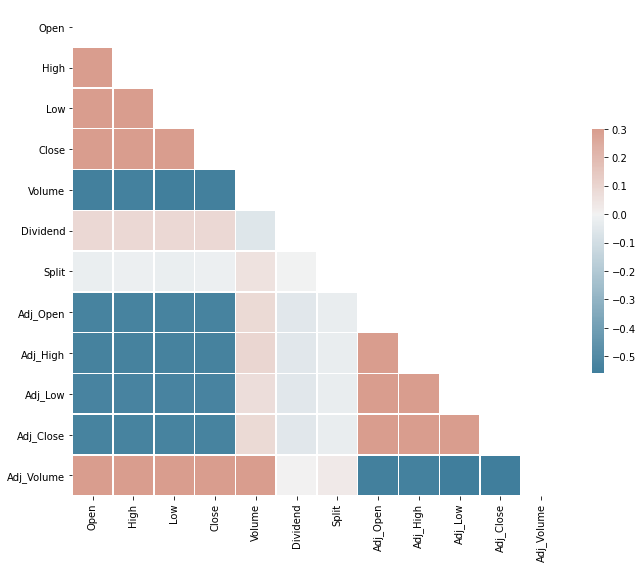

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
mask  = np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},cmap=cmap)


In [11]:
#Feature Engineering

In [12]:
df['HL-PCT'] = (df['Adj_High'] - df['Adj_Low'])/(df['Adj_Close']*100)

In [13]:
df['PCT_change'] = (df['Adj_Close']-df['Adj_Open'])/(df['Adj_Open']*100)

In [14]:
df = df.loc[:,['Adj_Close','HL-PCT','PCT_change','Adj_Volume']]

In [15]:
df

,Adj_Close,HL-PCT,PCT_change,Adj_Volume
Date,,,,
2013-09-03,15.476472,0.000271,-0.000092,331928800.0
2013-09-04,15.796753,0.000120,-0.000017,345032800.0
2013-09-05,15.688388,0.000142,-0.000100,236367600.0
2013-09-06,15.781833,0.000189,-0.000004,359525600.0
2013-09-09,16.033661,0.000088,0.000023,340687200.0
...,...,...,...,...
2017-12-21,42.101646,0.000110,0.000048,83799584.0
2017-12-22,42.101646,0.000053,0.000019,65397776.0
2017-12-26,41.033528,0.000105,-0.000013,132742144.0


<AxesSubplot:xlabel='Date'>

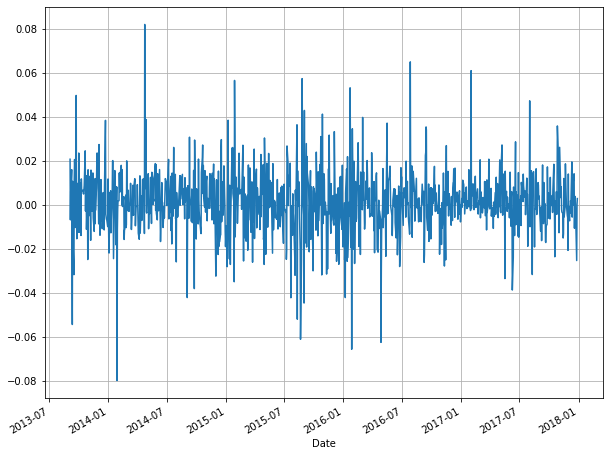

In [16]:
df['Adj_Close'].pct_change().plot(figsize=(10,8),grid=True)

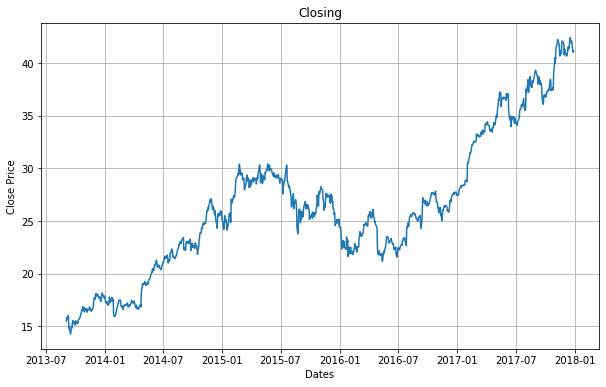

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df['Adj_Close'])

plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.title('Closing')
plt.show()


In [18]:
print("Shape of df:",df.shape)

label =  df['Adj_Close'].shift(-10)
print("Label having total null:",label.isna().sum())
print("Shape of label:",label.shape,"this includes null")
print(df['Adj_Close'])
print(label)
label.dropna(inplace=True)
y = np.array(label)
print("Shape of y after dropping null",y.shape)

Shape of df: (1090, 4)
Label having total null: 10
Shape of label: (1090,) this includes null
Date
2013-09-03    15.476472
2013-09-04    15.796753
2013-09-05    15.688388
2013-09-06    15.781833
2013-09-09    16.033661
                ...    
2017-12-21    42.101646
2017-12-22    42.101646
2017-12-26    41.033528
2017-12-27    41.040745
2017-12-28    41.156217
Name: Adj_Close, Length: 1090, dtype: float64
Date
2013-09-03    14.422914
2013-09-04    14.719406
2013-09-05    14.960780
2013-09-06    14.805882
2013-09-09    15.541726
                ...    
2017-12-21          NaN
2017-12-22          NaN
2017-12-26          NaN
2017-12-27          NaN
2017-12-28          NaN
Name: Adj_Close, Length: 1090, dtype: float64
Shape of y after dropping null (1080,)


In [19]:
X = df[['Adj_Close','HL-PCT','PCT_change']]
X.shape

(1090, 3)

In [20]:
X_late = X[-10:]
X = X[:-10]
X.shape

(1080, 3)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=41)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_late = scaler.transform(X_late)



In [25]:
reg = LinearRegression()
reg.fit(X_train,y_train)
score = reg.score(X_test,y_test)

print("Estimated Intercept Coefficent",reg.intercept_)
print("Number of coefficents",len(reg.coef_))


Estimated Intercept Coefficent 14.648095446084481
Number of coefficents 3


In [26]:
coefdf = pd.DataFrame(zip(X.columns,reg.coef_),columns=['features','EstimatedCoefficent'])
coefdf

,features,EstimatedCoefficent
0,Adj_Close,27.650713
1,HL-PCT,0.215047
2,PCT_change,0.206313


In [27]:
forcast = []
forecast = reg.predict(X_late)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE:",mse)
print("LinearReg score",score)
print(forecast)

MSE: 1.5334050043410823
LinearReg score 0.9652550591285393
[41.58270262 42.00681605 42.60644657 42.13346058 42.09458004 42.26086717
 42.24919896 41.1903932  41.19759896 41.31138746]
